# Inverse Linear Regression Proof

In this notebook we want to check if both ways of 'inverse linear regression' lead to the same result!
 
Write the function that uses expenses as input and sqft_living as output!
* Upload and preprocess the data
* Write a function to compute the Simple Linear Regression weights with sqft_living as output and price as input
* Write a function to make predictions of the output given the input feature of $1.000.000
 
Then write a function that uses sqft_living as input and price as output and invert it!
* Write a function to compute the Simple Linear Regression weights with price as output and sqft_living as input
* Write a function to make predictions of the input given the output feature of $1.000.000

# Upload and preprocess the data

Dataset on house sales data (housing.csv).

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')
# Look at the table to check potential features
data[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Split data into training and testing

In [2]:
from sklearn.model_selection import train_test_split
# Split data set into 80% train and 20% test data 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)
# Look at the shape to check the split ratio
train_data.shape, test_data.shape

((17290, 21), (4323, 21))

# Build a generic simple linear regression function 

Let's build a closed form solution (function) to compute the slope and intercept for a simple linear regression.

Sample regression:
\begin{equation}
\hat{y}_i = \hat{i} + \hat{s} x_i
\end{equation}

Sample intercept:
\begin{equation}
\hat{i} = \bar{y} – \hat{s} \bar{x}
\end{equation}

Sample slope:
\begin{equation}
\hat{s} = \frac{\sum(x_i – \bar{x}) (y_i – \bar{y})} {\sum(x_i – \bar{x})^2}
\end{equation}

Here are the sample means:

\begin{equation}
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

\begin{equation}
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
\end{equation}


In [3]:
from time import time

X = train_data['price'].values
Y = train_data['sqft_living'].values

### What a Statistician would do:

In [4]:
def simple_linear_regression(X, Y):
    
    # Compute the means:
    assert len(X) == len(Y)
    
    n = len(X)
    x_mean = sum(X) / n
    y_mean = sum(Y) / n
    
    # Compute the slope:
    slope = sum((X - x_mean) * (Y - y_mean)) / sum((X - x_mean)**2)
    
    # Compute the intercept:
    intercept = y_mean - slope * x_mean
    
    return (intercept, slope)

In [5]:
t0 = time()
sqft_intercept, sqft_slope = simple_linear_regression(X, Y)
t1 = time()

print('Elapsed time: {:.2f} milliseconds\n'.format((t1 - t0) * 1000))
print('Intercept: ' + str(sqft_intercept))
print('Slope: ' + str(sqft_slope))

Elapsed time: 5.48 milliseconds

Intercept: 1134.23538705004
Slope: 0.0017449919139801982


### What a Machine Learning Engineer would do:

In [6]:
from sklearn.linear_model import LinearRegression

def simple_linear_regression_sklearn(X, Y):
    X_2D = X.reshape(-1, 1)  # Convert to 2D array for Sklearn
    model = LinearRegression().fit(X_2D, Y)
    return (model.intercept_, model.coef_[0])

In [7]:
t0 = time()
sqft_intercept, sqft_slope = simple_linear_regression_sklearn(X, Y)
t1 = time()

print('Elapsed time: {:.2f} milliseconds\n'.format((t1 - t0) * 1000))
print('Intercept: ' + str(sqft_intercept))
print('Slope: ' + str(sqft_slope))

Elapsed time: 1.36 milliseconds

Intercept: 1134.235387050036
Slope: 0.0017449919139802053


### What a Computer Scientist would do:

In [8]:
def simple_linear_regression_optimized(input_feature, output):
    
    n = len(input_feature)
    
    # compute the sum of input_feature and output
    x_sum = input_feature.sum()
    y_sum = output.sum()
    
    # compute the product of the output and the input_feature and its sum
    xy = input_feature * output
    xy_sum = xy.sum()
    
    # compute the squared value of the input_feature and its sum
    x_squared = input_feature * input_feature
    x_squared_sum = x_squared.sum()
    
    # use the formula for the slope
    slope = (xy_sum - x_sum * y_sum / n) / (x_squared_sum - x_sum * x_sum / n)
    
    # use the formula for the intercept
    intercept = y_sum / n - slope * x_sum / n
    
    return (intercept, slope)

In [9]:
t0 = time()
sqft_intercept, sqft_slope = simple_linear_regression_optimized(X, Y)
t1 = time()

print('Elapsed time: {:.2f} milliseconds\n'.format((t1 - t0) * 1000))
print('Intercept: ' + str(sqft_intercept))
print('Slope: ' + str(sqft_slope))

Elapsed time: 0.35 milliseconds

Intercept: 1134.235387050036
Slope: 0.001744991913980205


### Plot data and function

# Predicting values

Now let's use that function of a simple regression model for predicting prices based on sqft - rembember that we train on train_data!

With the model parameters 'intercept & slope' we can now write a function to return the predicted output - given the input_feature, slope and intercept:

In [10]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(intercept, slope):
    axes = plt.gca() # get current axes
    x_vals = np.array(axes.get_xlim())
    y_vals = get_regression_predictions(x_vals, intercept, slope)
    plt.plot(x_vals, y_vals, 'r-')

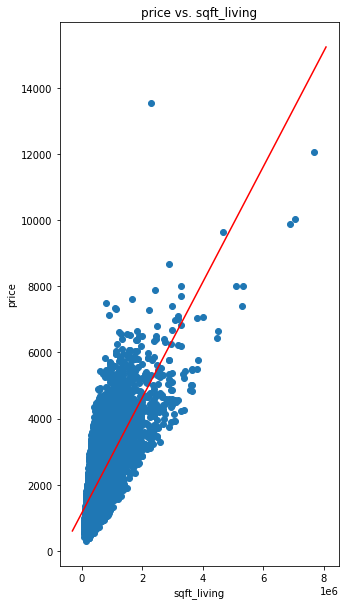

In [12]:
# Plot feature relations
plt.figure(figsize=(5,10))

plt.plot(X, Y, 'o')
plt.title('price vs. sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')

plot_function(sqft_intercept, sqft_slope)

# Additional Task: Go to your 2a insurance notebook from yesterday and fit a regression line into your plot of bmi vs. expenses

Now that we have this function let's make a prediction. 

* What is the estimated expense for an entry according to the model we estiamted above?

In [13]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')

my_budget = 1000000
estimated_sqft_living = get_regression_predictions(my_budget, sqft_intercept, sqft_slope)

my_budget_currency = locale.currency(my_budget, grouping=True)
print("The estimated sqft_living for a budget of {} is {:.2f}".format(my_budget_currency, estimated_sqft_living))

The estimated sqft_living for a budget of $1,000,000.00 is 2879.23


# Inverse Regression Prediction

The inverse process is calculated by solving `output = intercept + slope * input_feature` for `input_feature`.

In [14]:
def inverse_regression_predictions(output, intercept, slope):
    # Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [15]:
my_sqft = estimated_sqft_living
estimated_budget = inverse_regression_predictions(my_sqft, sqft_intercept, sqft_slope)

estimated_budget_currency = locale.currency(my_budget, grouping=True)
print("The estimated budget for a living of {:.2f} sqft is {}".format(estimated_sqft_living, estimated_budget_currency))

The estimated budget for a living of 2879.23 sqft is $1,000,000.00


Train an inverse model that predicts the budget based on the sqft_livingroom:

In [16]:
budget_intercept, budget_slope = simple_linear_regression(Y, X)

print('Intercept: ' + str(budget_intercept))
print('Slope: ' + str(budget_slope))

Intercept: -48257.06359102961
Slope: 283.96855715513044


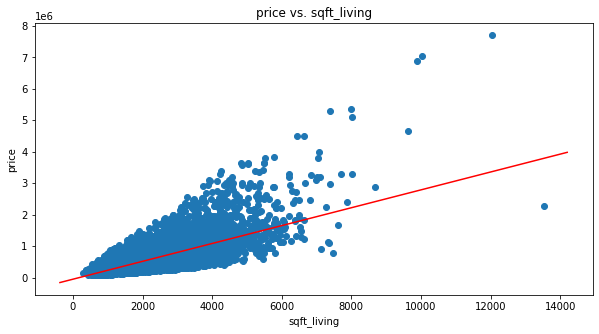

In [17]:
# Plot feature relations
plt.figure(figsize=(10,5))

plt.plot(Y, X, 'o')
plt.title('price vs. sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')

plot_function(budget_intercept, budget_slope)

Compare the output of the inverse model with an inverse prediction, against the first model:

In [18]:
my_budget_2 = 1000000
estimated_sqft_living_2 = inverse_regression_predictions(my_budget_2, budget_intercept, budget_slope)

my_budget_2_currency = locale.currency(my_budget_2, grouping=True)
print("The estimated sqft_living for a budget of {} is {:.2f}".format(my_budget_2_currency, estimated_sqft_living_2))

The estimated sqft_living for a budget of $1,000,000.00 is 3691.45


The short answer is [here](https://stats.stackexchange.com/a/20560):

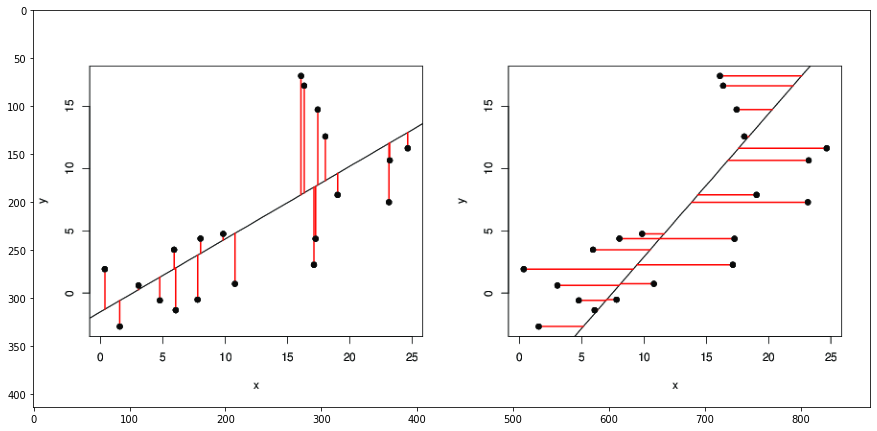

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('regression.png'))

The long answer is [here](https://stats.stackexchange.com/a/20556):

Given $n$ data points $(x_i,y_i), i = 1,2,\ldots n$, in the plane, let us draw a straight line $y = ax+b$.  If we predict $ax_i+b$ as the value $\hat{y}_i$ of $y_i$, then the _error_ is $(y_i-\hat{y}_i) = (y_i-ax_i-b)$, the _squared error_ is $(y_i-ax_i-b)^2$, and the _total squared error_ $\sum_{i=1}^n (y_i-ax_i-b)^2$. We ask

>What choice of $a$ and $b$ minimizes 
$S =\displaystyle\sum_{i=1}^n (y_i-ax_i-b)^2$ ?

Since $(y_i-ax_i-b)$ is the vertical distance of $(x_i,y_i)$ from the straight line, we are asking for the line such that the sum of the squares of the vertical distances of the points from the line is as small as possible.  Now $S$  is a quadratic function of both $a$ and $b$ and attains its minimum value when $a$ and $b$ are such that

$$
\begin{align*}
\frac{\partial S}{\partial a} &= 2\sum_{i=1}^n (y_i-ax_i-b)(-x_i) &= 0\\
\frac{\partial S}{\partial b} &= 2\sum_{i=1}^n (y_i-ax_i-b)(-1) &= 0
\end{align*}
$$

From the second equation, we get

$$
b = \frac{1}{n}\sum_{i=1}^n (y_i - ax_i) = \mu_y - a\mu_x
$$

where $\displaystyle \mu_y = \frac{1}{n}\sum_{i=1}^n y_i, ~ \mu_x = \frac{1}{n}\sum_{i=1}^n x_i$ are the arithmetic average values of the $y_i$'s and the $x_i$'s respectively. Substituting into the first equation, we get

$$
a = \frac{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y}{
\left( \frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2}.
$$

Thus, the line that minimizes $S$ can be expressed as

$$
y = ax+b = \mu_y +
\left(\frac{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y}{
\left( \frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2}\right)
(x - \mu_x),
$$

and the minimum value of $S$ is

$$
S_{\min} =  
\frac{\left[\left(\frac{1}{n}\sum_{i=1}^n y_i^2\right)  -\mu_y^2\right]
\left[\left(\frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2\right]
-
\left[\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) 
-\mu_x\mu_y\right]^2}{\left(\frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2}.
$$

If we interchange the roles of $x$ and $y$, draw a line $x = \hat{a}y + \hat{b}$, and ask for the values of
$\hat{a}$ and $\hat{b}$ that minimize

$$
T = \sum_{i=1}^n (x_i - \hat{a}y_i - \hat{b})^2,
$$

that is, we want the line such that the sum of the squares of the _horizontal_ distances of the points from the line is as small as possible, then we get

$$
x = \hat{a}y+\hat{b} = \mu_x +
\left(\frac{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y}{
\left( \frac{1}{n}\sum_{i=1}^n y_i^2\right)  -\mu_y^2}\right)
(y - \mu_y)
$$ 

and the minimum value of $T$ is

$$
T_{\min} =  
\frac{\left[\left(\frac{1}{n}\sum_{i=1}^n y_i^2\right)  -\mu_y^2\right]
\left[\left(\frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2\right]
-
\left[\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) 
-\mu_x\mu_y\right]^2}{\left(\frac{1}{n}\sum_{i=1}^n y_i^2\right)  -\mu_y^2}.
$$

Note that both lines pass through the point $(\mu_x,\mu_y)$ but the slopes are 
$$
a = 
\frac{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y}{
\left( \frac{1}{n}\sum_{i=1}^n x_i^2\right)  -\mu_x^2},~~
\hat{a}^{-1} = \frac{
\left( \frac{1}{n}\sum_{i=1}^n y_i^2\right)  -\mu_y^2}{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y}
$$
are different in general. The slopes are the same when all the points $(x_i,y_i)$ lie on the same straight line.  To see this, note that 

$$
\hat{a}^{-1} - a = \frac{S_{\min}}{\left(\frac{1}{n}\sum_{i=1}^n x_iy_i\right) -\mu_x\mu_y} = 0 \Rightarrow S_{\min} = 0 \Rightarrow y_i=ax_i+b, i=1,2,\ldots, n.
$$